# Data Source Comparison
This document describes how the data changed, when moving from the old data source, to the new IATI data source.

In [4]:
import os
os.chdir('/home/jovyan/iati-partner-search/ips_python')

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
from constants import (
    PROCESSED_RECORDS_FILENAME,
    INPUT_DATA_FILENAME)
from utils import get_data_path
from preprocessing import preprocess_pipeline

In [6]:
#read new data
df_new = pd.read_csv(join(get_data_path(), INPUT_DATA_FILENAME.replace('.csv', '_new.csv')), encoding="iso-8859-1")

In [8]:
#Check description_narrative and description_narrative_text columns contain identical number of characters (expected: no rows):
df_new[df_new['description_narrative'].map(str).apply(len) != df_new['description_narrative_text'].map(str).apply(len)].shape[0]

0

In [9]:
#Rename columns to match old data
df_new = df_new.rename(columns={'description_narrative_text': 'description', 'title_narrative_text': 'title', 'iati_identifier':'iati.identifier'})
df_new = df_new[['iati.identifier', 'title', 'description']]

In [10]:
#read old data
df_old = pd.read_csv(join(get_data_path(), INPUT_DATA_FILENAME.replace('.csv', '_old.csv')), encoding="iso-8859-1")
df_old = df_old[['iati.identifier', 'title', 'description']]

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,3,7,10,11,12,13,14,15,16,17,18,20,22,23,24,25,26,28,29,30,31,32,33,34,35,36,37,38,39,40,41,46,47,48,49,50,51,52,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
# clean empty text and merge title
print("new df row count before clean: {0}".format(df_new.shape[0]))
df_new = df_new.loc[~df_new["iati.identifier"].isna()]
df_new = df_new[~df_new["iati.identifier"].str.isspace()]
df_new.loc[df_new["description"].isna(), ["description"]] = df_new["title"]
df_new.loc["description"] = df_new["title"] + " " + df_new["description"]
df_new =df_new.loc[~df_new["description"].isna()]
df_new =df_new.loc[~df_new["description"].str.isspace()]
print("new df row count after clean: {0}".format(df_new.shape[0]))
print("old df row count before clean: {0}".format(df_old.shape[0]))
df_old = df_old.loc[~df_old["iati.identifier"].isna()]
df_old = df_old[~df_old["iati.identifier"].str.isspace()]
df_old.loc[df_old["description"].isna(), ["description"]] = df_old["title"]
df_old.loc["description"] = df_old["title"] + " " + df_old["description"]
df_old =df_old.loc[~df_old["description"].isna()]
df_old =df_old.loc[~df_old["description"].str.isspace()]
print("old df row count after clean: {0}".format(df_old.shape[0]))

new df row count before clean: 962449
new df row count after clean: 959355
old df row count before clean: 1020000
old df row count after clean: 1009067


In [12]:
#Number of IATI Identifier values in new, not old and in old, not new
print("count of iati_identifier in new, not in old: {0}".format(df_new[~df_new['iati.identifier'].isin(df_old['iati.identifier'])].shape[0]))

print("count of iati_identifier in old, not in new: {0}".format(df_old[~df_old['iati.identifier'].isin(df_new['iati.identifier'])].shape[0]))

count of iati_identifier in new, not in old: 320662
count of iati_identifier in old, not in new: 370374


In [13]:
df_new['words'] = df_new['description'].str.count(' ').add(1)

print("Initial NEW DF word stats \n{0}".format(df_new['words'].describe()))

Initial NEW DF word stats 
count    959355.000000
mean         51.589194
std         109.683399
min           1.000000
25%          10.000000
50%          16.000000
75%          51.000000
max       12524.000000
Name: words, dtype: float64


In [21]:
df_old['words'] = df_old['description'].str.count(' ').add(1)
pd.set_option('float_format', '{:f}'.format)
print("Initial OLD DF word stats \n{0}".format(df_old['words'].describe()))

Initial OLD DF word stats 
count   1009067.000000
mean         36.744806
std          74.189388
min           1.000000
25%           8.000000
50%          14.000000
75%          39.000000
max       12524.000000
Name: words, dtype: float64


In [19]:
df_new = preprocess_pipeline(df_new)

In [23]:
df_new['words'] = df_new['description'].str.count(' ').add(1)
print("Preprocessed NEW DF word stats \n{0}".format(df_new['words'].describe()))

Preprocessed NEW DF word stats 
count   845945.000000
mean        17.848165
std         33.220827
min          1.000000
25%          3.000000
50%          8.000000
75%         18.000000
max       4402.000000
Name: words, dtype: float64


In [ ]:
df_old = preprocess_pipeline(df_old)

In [28]:
df_old['words'] = df_old['description'].str.count(' ').add(1)
print("Preprocessed OLD DF word stats \n{0}".format(df_old['words'].describe()))

Preprocessed OLD DF word stats 
count   804690.000000
mean        13.786120
std         22.610445
min          1.000000
25%          3.000000
50%          6.000000
75%         16.000000
max       4427.000000
Name: words, dtype: float64


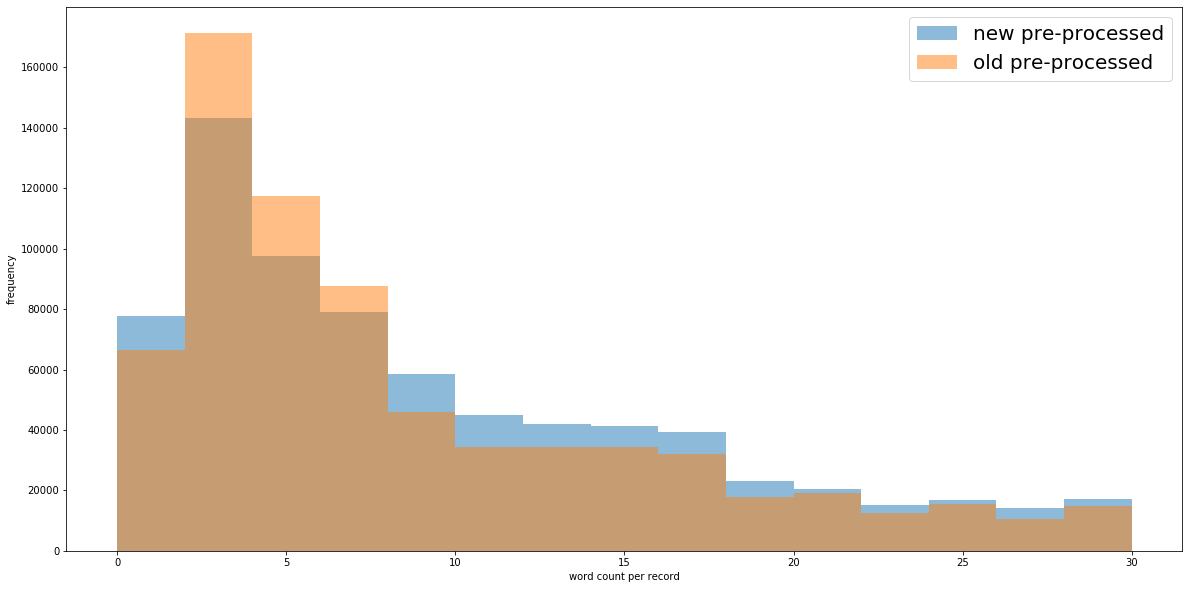

In [33]:
plt.figure(figsize=(20,10))
plt.hist(df_new['words'], bins=15, range=[0,30], alpha=0.5, label='new pre-processed')
plt.hist(df_old['words'], bins=15, range=[0,30],alpha=0.5, label='old pre-processed')
plt.legend(prop={'size':20})
plt.xlabel('word count per record')
plt.ylabel('frequency')
plt.show()